来到了新的一片区域，继续挑战！

---
### 第9题地址[good.html](http://www.pythonchallenge.com/pc/return/good.html)（本题开始需要密码，密码是通过上一个区域最后一题得到的）
* <img src="http://www.pythonchallenge.com/pc/return/good.jpg" alt="good.jpg" width="30%" height="30%">
* 网页标题是`connect the dots`，题目为空，[源码](view-source:http://www.pythonchallenge.com/pc/return/good.html)中有包含一大串数字的隐藏代码，隐藏的题目是
> first+second=?

图片中是有一些点，但根据题目一贯的做法，应该是跟隐藏内容有关。<br>
隐藏内容是一堆数字，但大部分是三位数，结合`connect the dots`，这些数应该就是坐标值，而我们要把它们连起来。

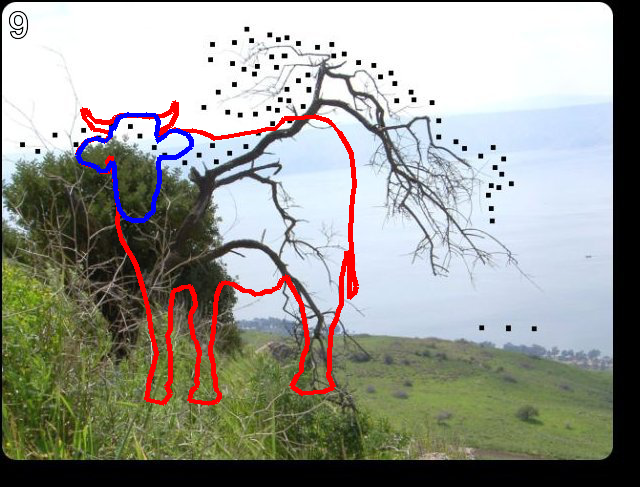

In [1]:
from io import BytesIO
import re
import requests
from PIL import Image, ImageDraw
with requests.Session() as sess:
    sess.auth = ('huge', 'file')
    response = sess.get('http://www.pythonchallenge.com/pc/return/good.html').text
    hided_text = re.search(r'first:(?P<first>.*?)second:(?P<second>.*?)-->', response.replace('\n', ''))
    first = [int(x) for x in re.findall(r'(\d+)', hided_text.group('first'))]
    second = [int(x) for x in re.findall(r'(\d+)', hided_text.group('second'))]
    img = Image.open(BytesIO(sess.get('http://www.pythonchallenge.com/pc/return/good.jpg').content))

draw = ImageDraw.Draw(img)
draw.line(first, 'red', 5)
draw.line(second, 'blue', 5)
img

可以看到，`first`数组描绘的是牛身，`second`数组描绘的是牛头，所以答案是[bull.html](http://www.pythonchallenge.com/pc/return/bull.html)，打开进入下一题。

### 总结：这一题感觉是pillow库的进阶一点的用法，难度不高。
###### 本题代码地址[9_good.ipynb](https://github.com/StevenPZChan/pythonchallenge/blob/notebook/nbfiles/9_good.ipynb)